In [3]:
from metrics import Distance
from matplotlib import pyplot as plt
from mlflux.eval import heatmap, annotate_heatmap
from metrics import Stoch
import numpy as np
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
dir = '/scratch/jw8736/gotm/ensem/2011-01-01_2020-01-01/'
years = (2011,2012,2015,2016)
num1 = {'flux': 'Bulk', 'method': 'kepsilon', 'MINUTE': 10}
num2 = {'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 10}
num3 = {'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 60}
num4 = {'flux': 'ANN', 'method': 'kepsilon', 'MINUTE': 10}
num5 = {'flux': 'ANN', 'method': 'kpp', 'MINUTE': 10}
num6 = {'flux': 'ANN', 'method': 'kpp', 'MINUTE': 60}

## Between ANN deterministic and bulk

In [4]:
# MLD is absolute signed so always positive
# So a negative bias is shallower
bias1 = Distance (years, combo=num4, combo_ref=num1, dir=dir)
bias1.read_compute()
bias2 = Distance (years, combo=num5, combo_ref=num2, dir=dir)
bias2.read_compute()
bias3 = Distance (years, combo=num6, combo_ref=num3, dir=dir)
bias3.read_compute()

Compare between 
{'flux': 'ANN', 'method': 'kepsilon', 'MINUTE': 10}
and
{'flux': 'Bulk', 'method': 'kepsilon', 'MINUTE': 10}
Compare between 
{'flux': 'ANN', 'method': 'kpp', 'MINUTE': 10}
and
{'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 10}
Compare between 
{'flux': 'ANN', 'method': 'kpp', 'MINUTE': 60}
and
{'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 60}


### MLD

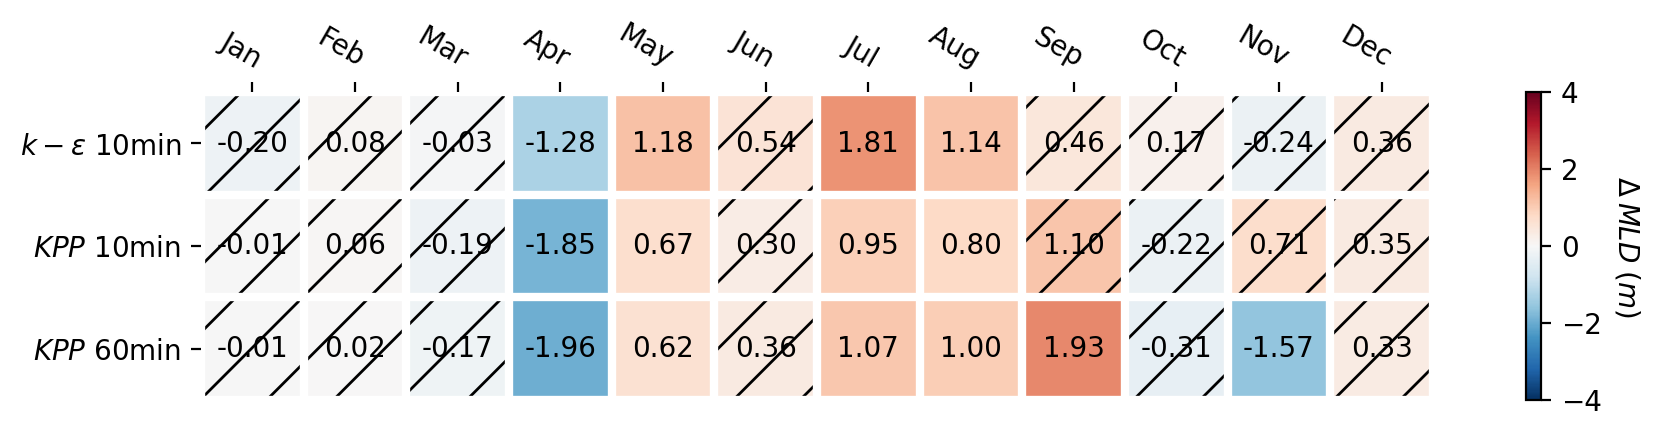

In [101]:
fig = plt.figure(figsize=[12,2], dpi=200); ax = plt.gca()

option = 'MLD_diffs'  
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in [bias1, bias2, bias3]]
sign_agree = [bias.checksigns(option) for bias in [bias1, bias2, bias3]]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)

row_labels = ['$k-\epsilon$ 10min', '$KPP$ 10min', '$KPP$ 60min']
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=4, vmin=-4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: MLD \; (m)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)

for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

### SST

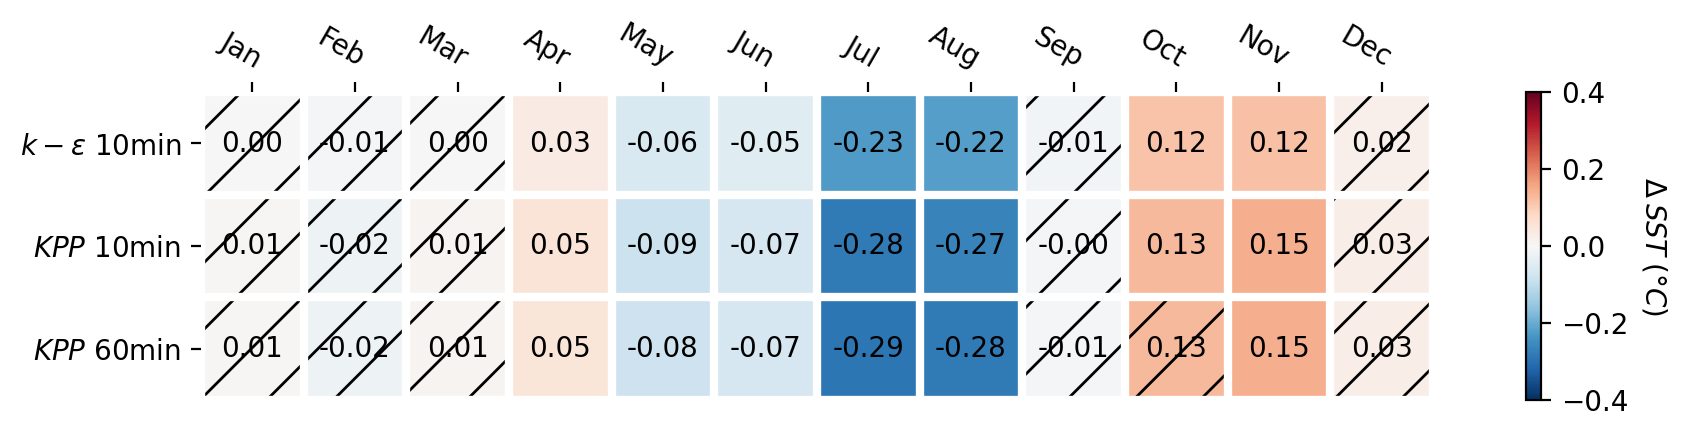

In [102]:
fig = plt.figure(figsize=[12,2], dpi=200); ax = plt.gca()

option = 'SST_diffs' 
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in [bias1, bias2, bias3]]
sign_agree = [bias.checksigns(option) for bias in [bias1, bias2, bias3]]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)

row_labels = ['$k-\epsilon$ 10min', '$KPP$ 10min', '$KPP$ 60min']
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=0.4, vmin=-0.4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: SST \; (\degree C)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)

for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

### Total Q

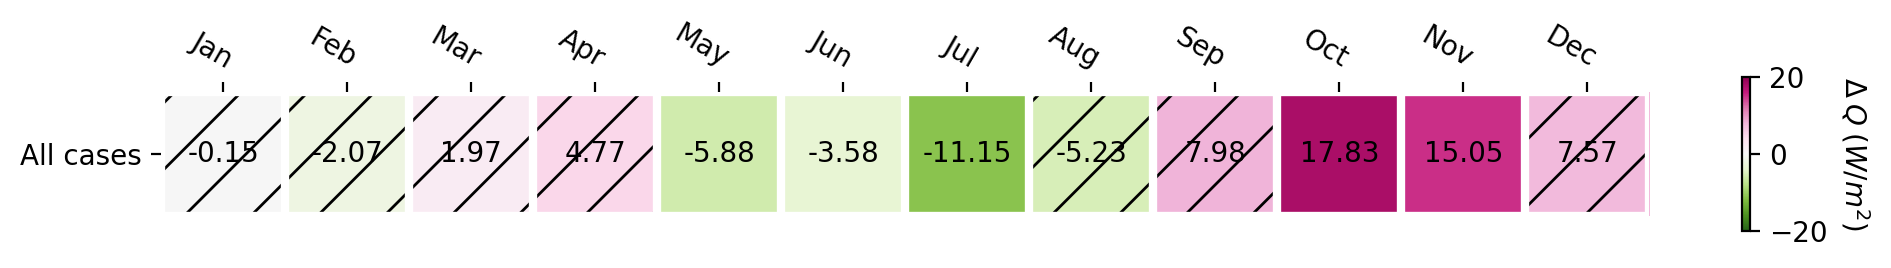

In [84]:
fig = plt.figure(figsize=[12,1], dpi=200); ax = plt.gca()

option = 'Q_diffs' 
yaver_bias = getattr(bias1, option).mean(axis=0) 
sign_agree = bias1.checksigns(option) 
yaver_bias = np.array(yaver_bias).reshape(1,-1); sign_agree = np.array(sign_agree).reshape(1,-1)

row_labels = ['All cases']
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=20, vmin=-20, cmap='PiYG_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: Q \; (W/m^2)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)

for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

### Together

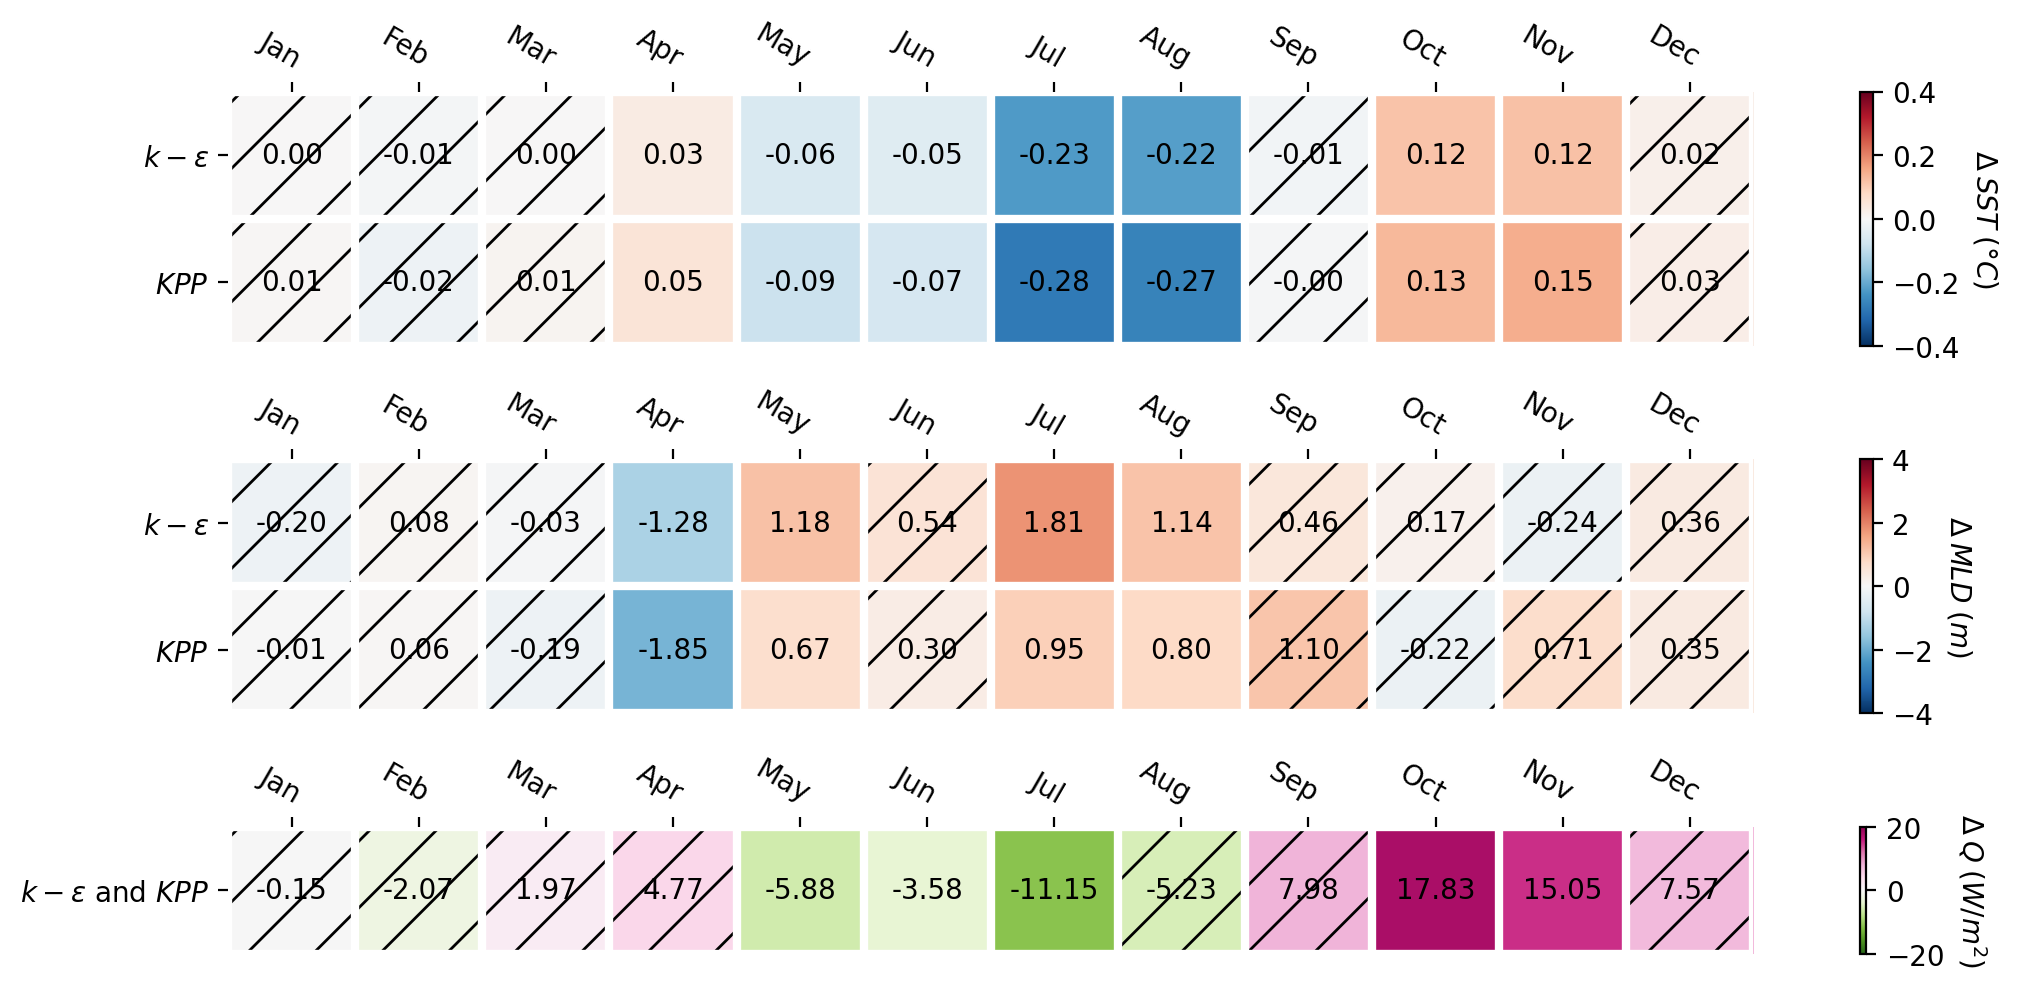

In [7]:
fig, axes = plt.subplots(3, 1, figsize=[12,5], dpi=200, height_ratios=[2,2,1], sharex=True)
biases = [bias1, bias2] 
row_labels = ['$k-\epsilon$', '$KPP$'] 

# fig, axes = plt.subplots(3, 1, figsize=[12,5], dpi=200, height_ratios=[3,3,1], sharex=True)
# biases = [bias1, bias2, bias3]
# row_labels = ['$k-\epsilon$ 10min', '$KPP$ 10min', '$KPP$ 60min']

# SST
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = axes[0]; option = 'SST_diffs' 
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=0.4, vmin=-0.4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: SST \; (\degree C)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# MLD
ax = axes[1]; option = 'MLD_diffs'  
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=4, vmin=-4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: MLD \; (m)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# Q
row_labels = ['$k-\epsilon$ and $KPP$']
ax = axes[2]; option = 'Q_diffs' 
yaver_bias = getattr(bias1, option).mean(axis=0) 
sign_agree = bias1.checksigns(option) 
yaver_bias = np.array(yaver_bias).reshape(1,-1); sign_agree = np.array(sign_agree).reshape(1,-1)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=20, vmin=-20, cmap='PiYG_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: Q \; (W/m^2)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

plt.tight_layout()
plt.savefig(f'../plots/heatmap.png', bbox_inches='tight')

### Check spread between years

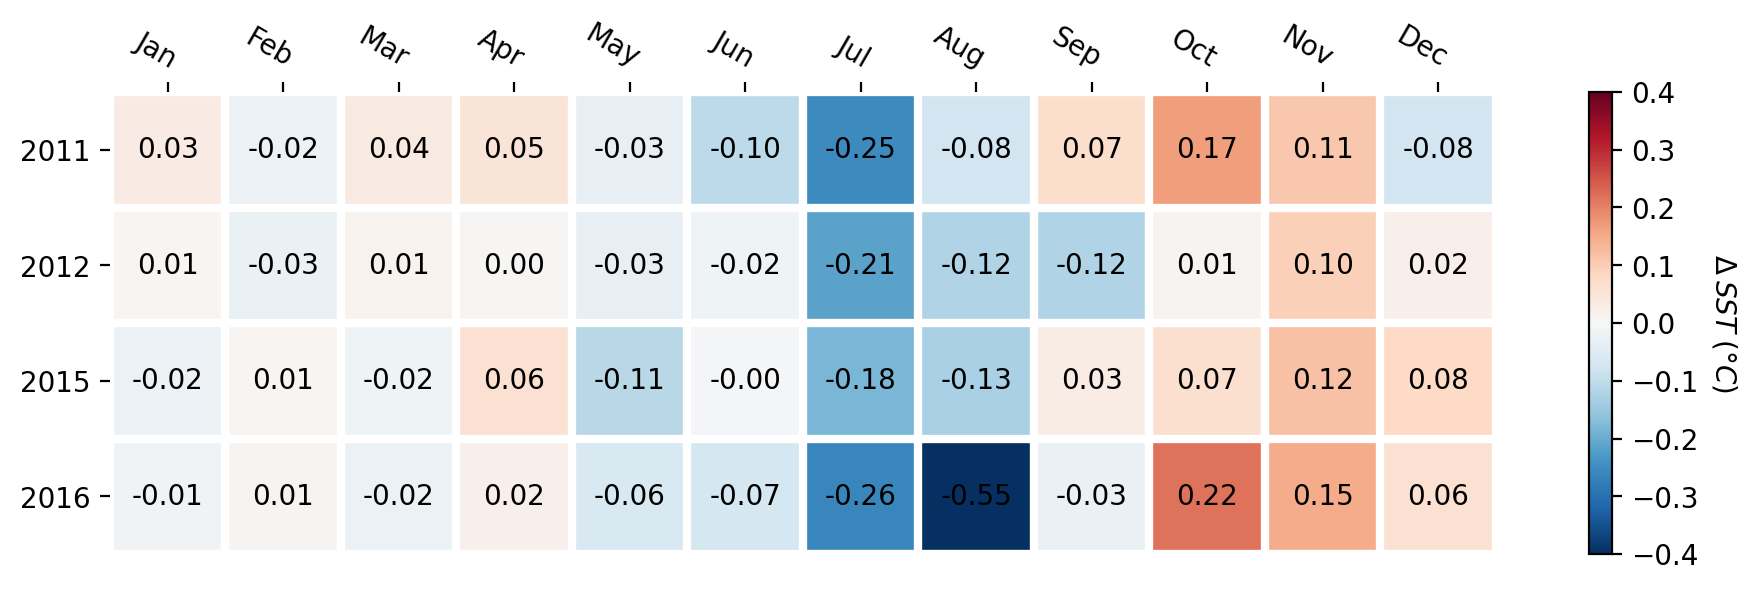

In [108]:
row_labels = ['2011', '2012', '2015', '2016']
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=[12,3], dpi=200); ax = plt.gca()
option = 'SST_diffs' 
bias = bias1
bias_overyears = getattr(bias, option)
im, cbar = heatmap(bias_overyears, row_labels, col_labels, ax=ax, vmax=0.4, vmin=-0.4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: SST \; (\degree C)$")
texts = annotate_heatmap(im, data=bias_overyears, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)

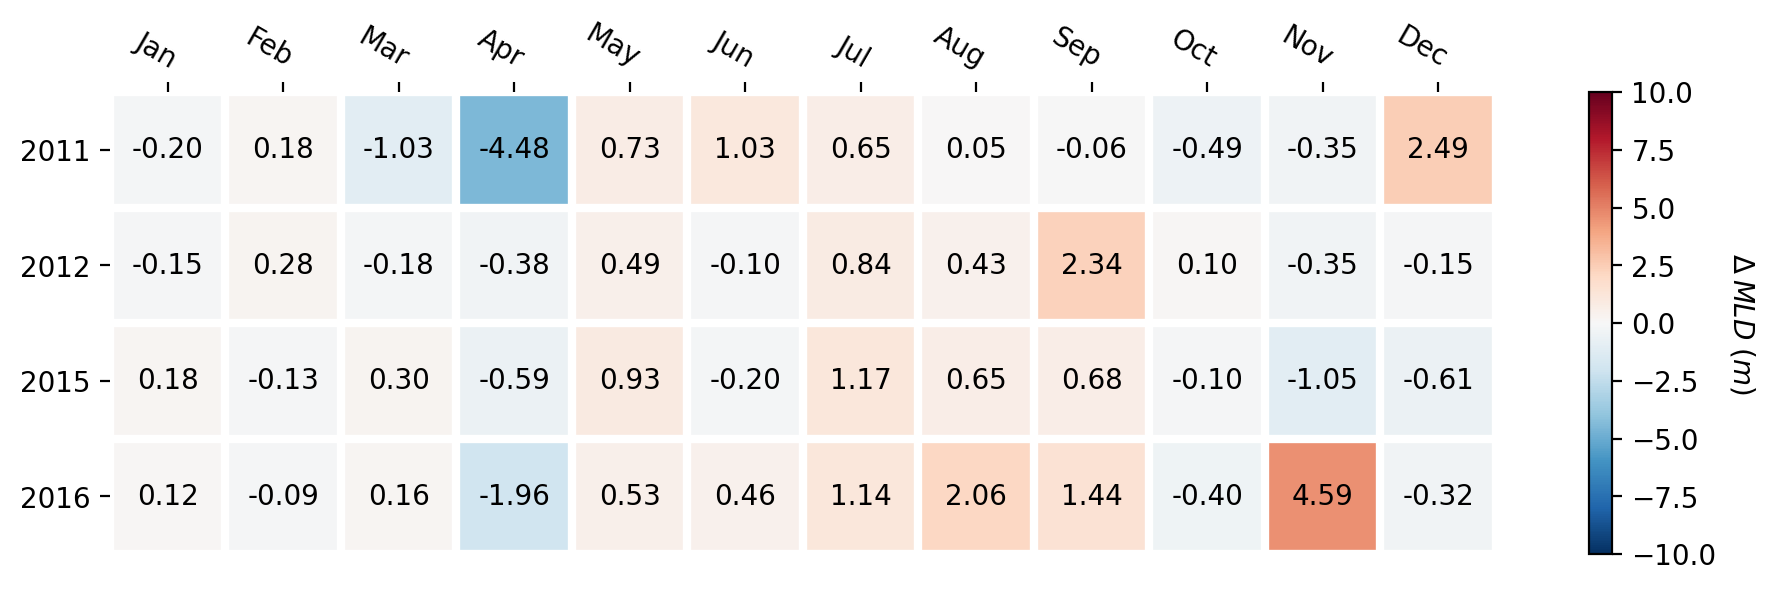

In [110]:
row_labels = ['2011', '2012', '2015', '2016']
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=[12,3], dpi=200); ax = plt.gca()
option = 'MLD_diffs' 
bias = bias2
bias_overyears = getattr(bias, option)
im, cbar = heatmap(bias_overyears, row_labels, col_labels, ax=ax, vmax=10, vmin=-10, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: MLD \; (m)$")
texts = annotate_heatmap(im, data=bias_overyears, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)

## Uncertainty of stochastic runs

In [2]:
dir = '/scratch/jw8736/gotm/ensem/2011-01-01_2020-01-01/'
years = (2011,2012,2015,2016)
num1 = {'flux': 'Bulk', 'method': 'kepsilon', 'MINUTE': 10}
num2 = {'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 10}
num3 = {'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 60}
num4 = {'flux': 'ANN', 'method': 'kepsilon', 'MINUTE': 10}
num5 = {'flux': 'ANN', 'method': 'kpp', 'MINUTE': 10}
num6 = {'flux': 'ANN', 'method': 'kpp', 'MINUTE': 60}

In [8]:
stoch1 = Stoch(years, num4, dir)
stoch1.read_compute()
stoch2 = Stoch(years, num5, dir)
stoch2.read_compute()

2011
Done computing MLD!
2012
Done computing MLD!
2015
Done computing MLD!
2016
Done computing MLD!
2011
Done computing MLD!
2012
Done computing MLD!
2015
Done computing MLD!
2016
Done computing MLD!


### Drift

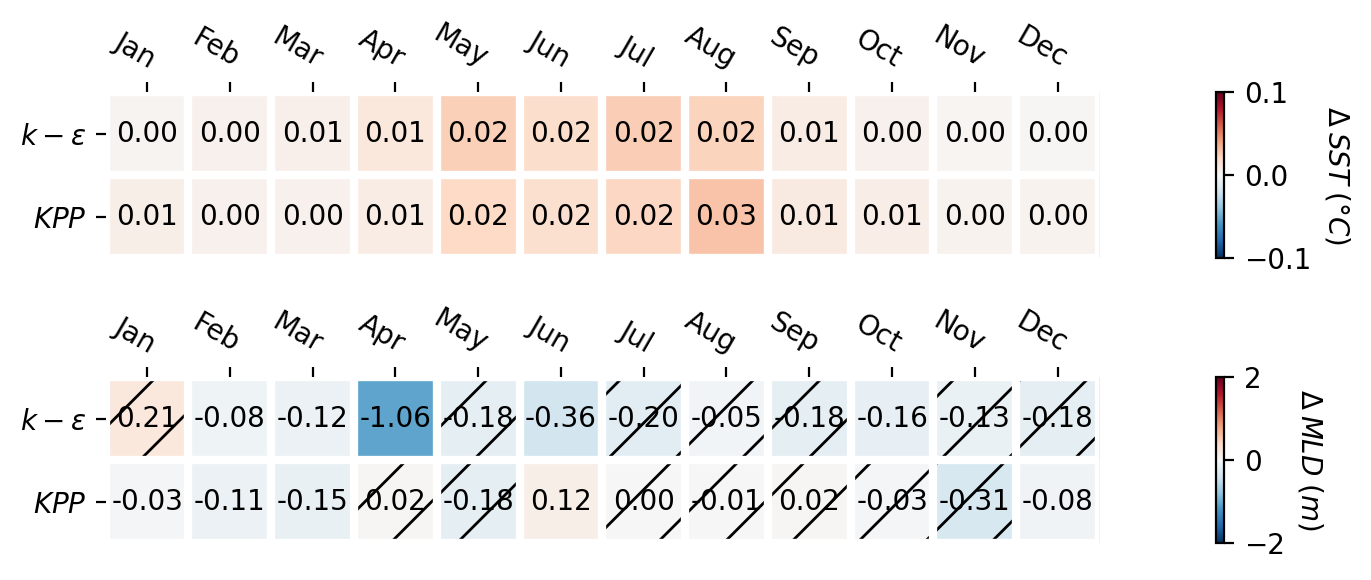

In [15]:
fig, axes = plt.subplots(2, 1, figsize=[12,3], dpi=200, height_ratios=[1,1], sharex=True)
stochs = [stoch1, stoch2] 
row_labels = ['$k-\epsilon$', '$KPP$'] 

# fig, axes = plt.subplots(3, 1, figsize=[12,5], dpi=200, height_ratios=[3,3,1], sharex=True)
# biases = [bias1, bias2, bias3]
# row_labels = ['$k-\epsilon$ 10min', '$KPP$ 10min', '$KPP$ 60min']

# SST
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = axes[0]; option = 'SST_diffs' 
yaver_bias = [getattr(stoch, option).mean(axis=0) for stoch in stochs]
sign_agree = [stoch.checksigns(option) for stoch in stochs]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=0.1, vmin=-0.1, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: SST \; (\degree C)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# MLD
ax = axes[1]; option = 'MLD_diffs'  
yaver_bias = [getattr(stoch, option).mean(axis=0) for stoch in stochs]
sign_agree = [stoch.checksigns(option) for stoch in stochs]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=2, vmin=-2, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: MLD \; (m)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

plt.tight_layout()
plt.savefig(f'../plots/stoch_drift.png', bbox_inches='tight')

### Spread

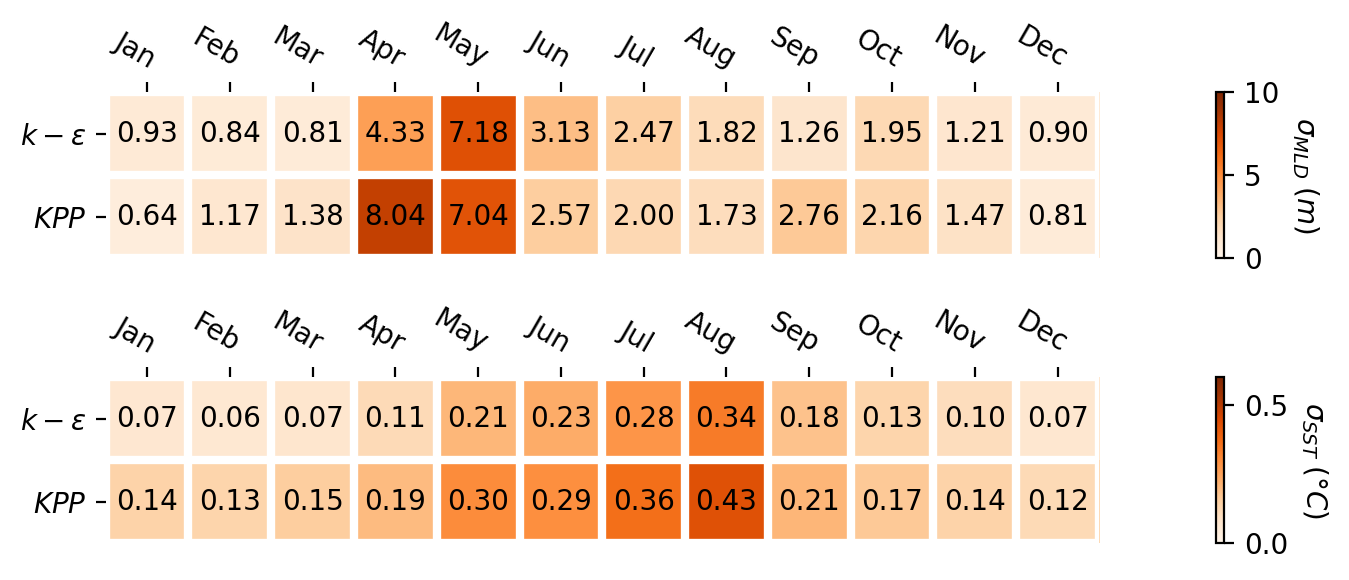

In [11]:
fig, axes = plt.subplots(2, 1, figsize=[12,3], dpi=200, height_ratios=[1,1], sharex=True)
stochs = [stoch1, stoch2] 
row_labels = ['$k-\epsilon$', '$KPP$'] 
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# MLD spread
ax = axes[0]; option = 'MLD_stds'  
yaver_stds = np.array([getattr(stoch, option).mean(axis=0) for stoch in stochs])
im, cbar = heatmap(yaver_stds, row_labels, col_labels, ax=ax, vmax=10, vmin=0, cmap='Oranges', 
                   cbar_kw=None, cbarlabel=r"$\sigma_{MLD} \; (m)$")
texts = annotate_heatmap(im, data=yaver_stds, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)

ax = axes[1]; option = 'SST_stds'  
yaver_stds = np.array([getattr(stoch, option).mean(axis=0) for stoch in stochs])
im, cbar = heatmap(yaver_stds, row_labels, col_labels, ax=ax, vmax=0.6, vmin=0, cmap='Oranges', 
                   cbar_kw=None, cbarlabel=r"$\sigma_{SST} \; (\degree C)$")
texts = annotate_heatmap(im, data=yaver_stds, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)
plt.tight_layout()
# plt.savefig(f'../plots/stoch_spread.png', bbox_inches='tight')

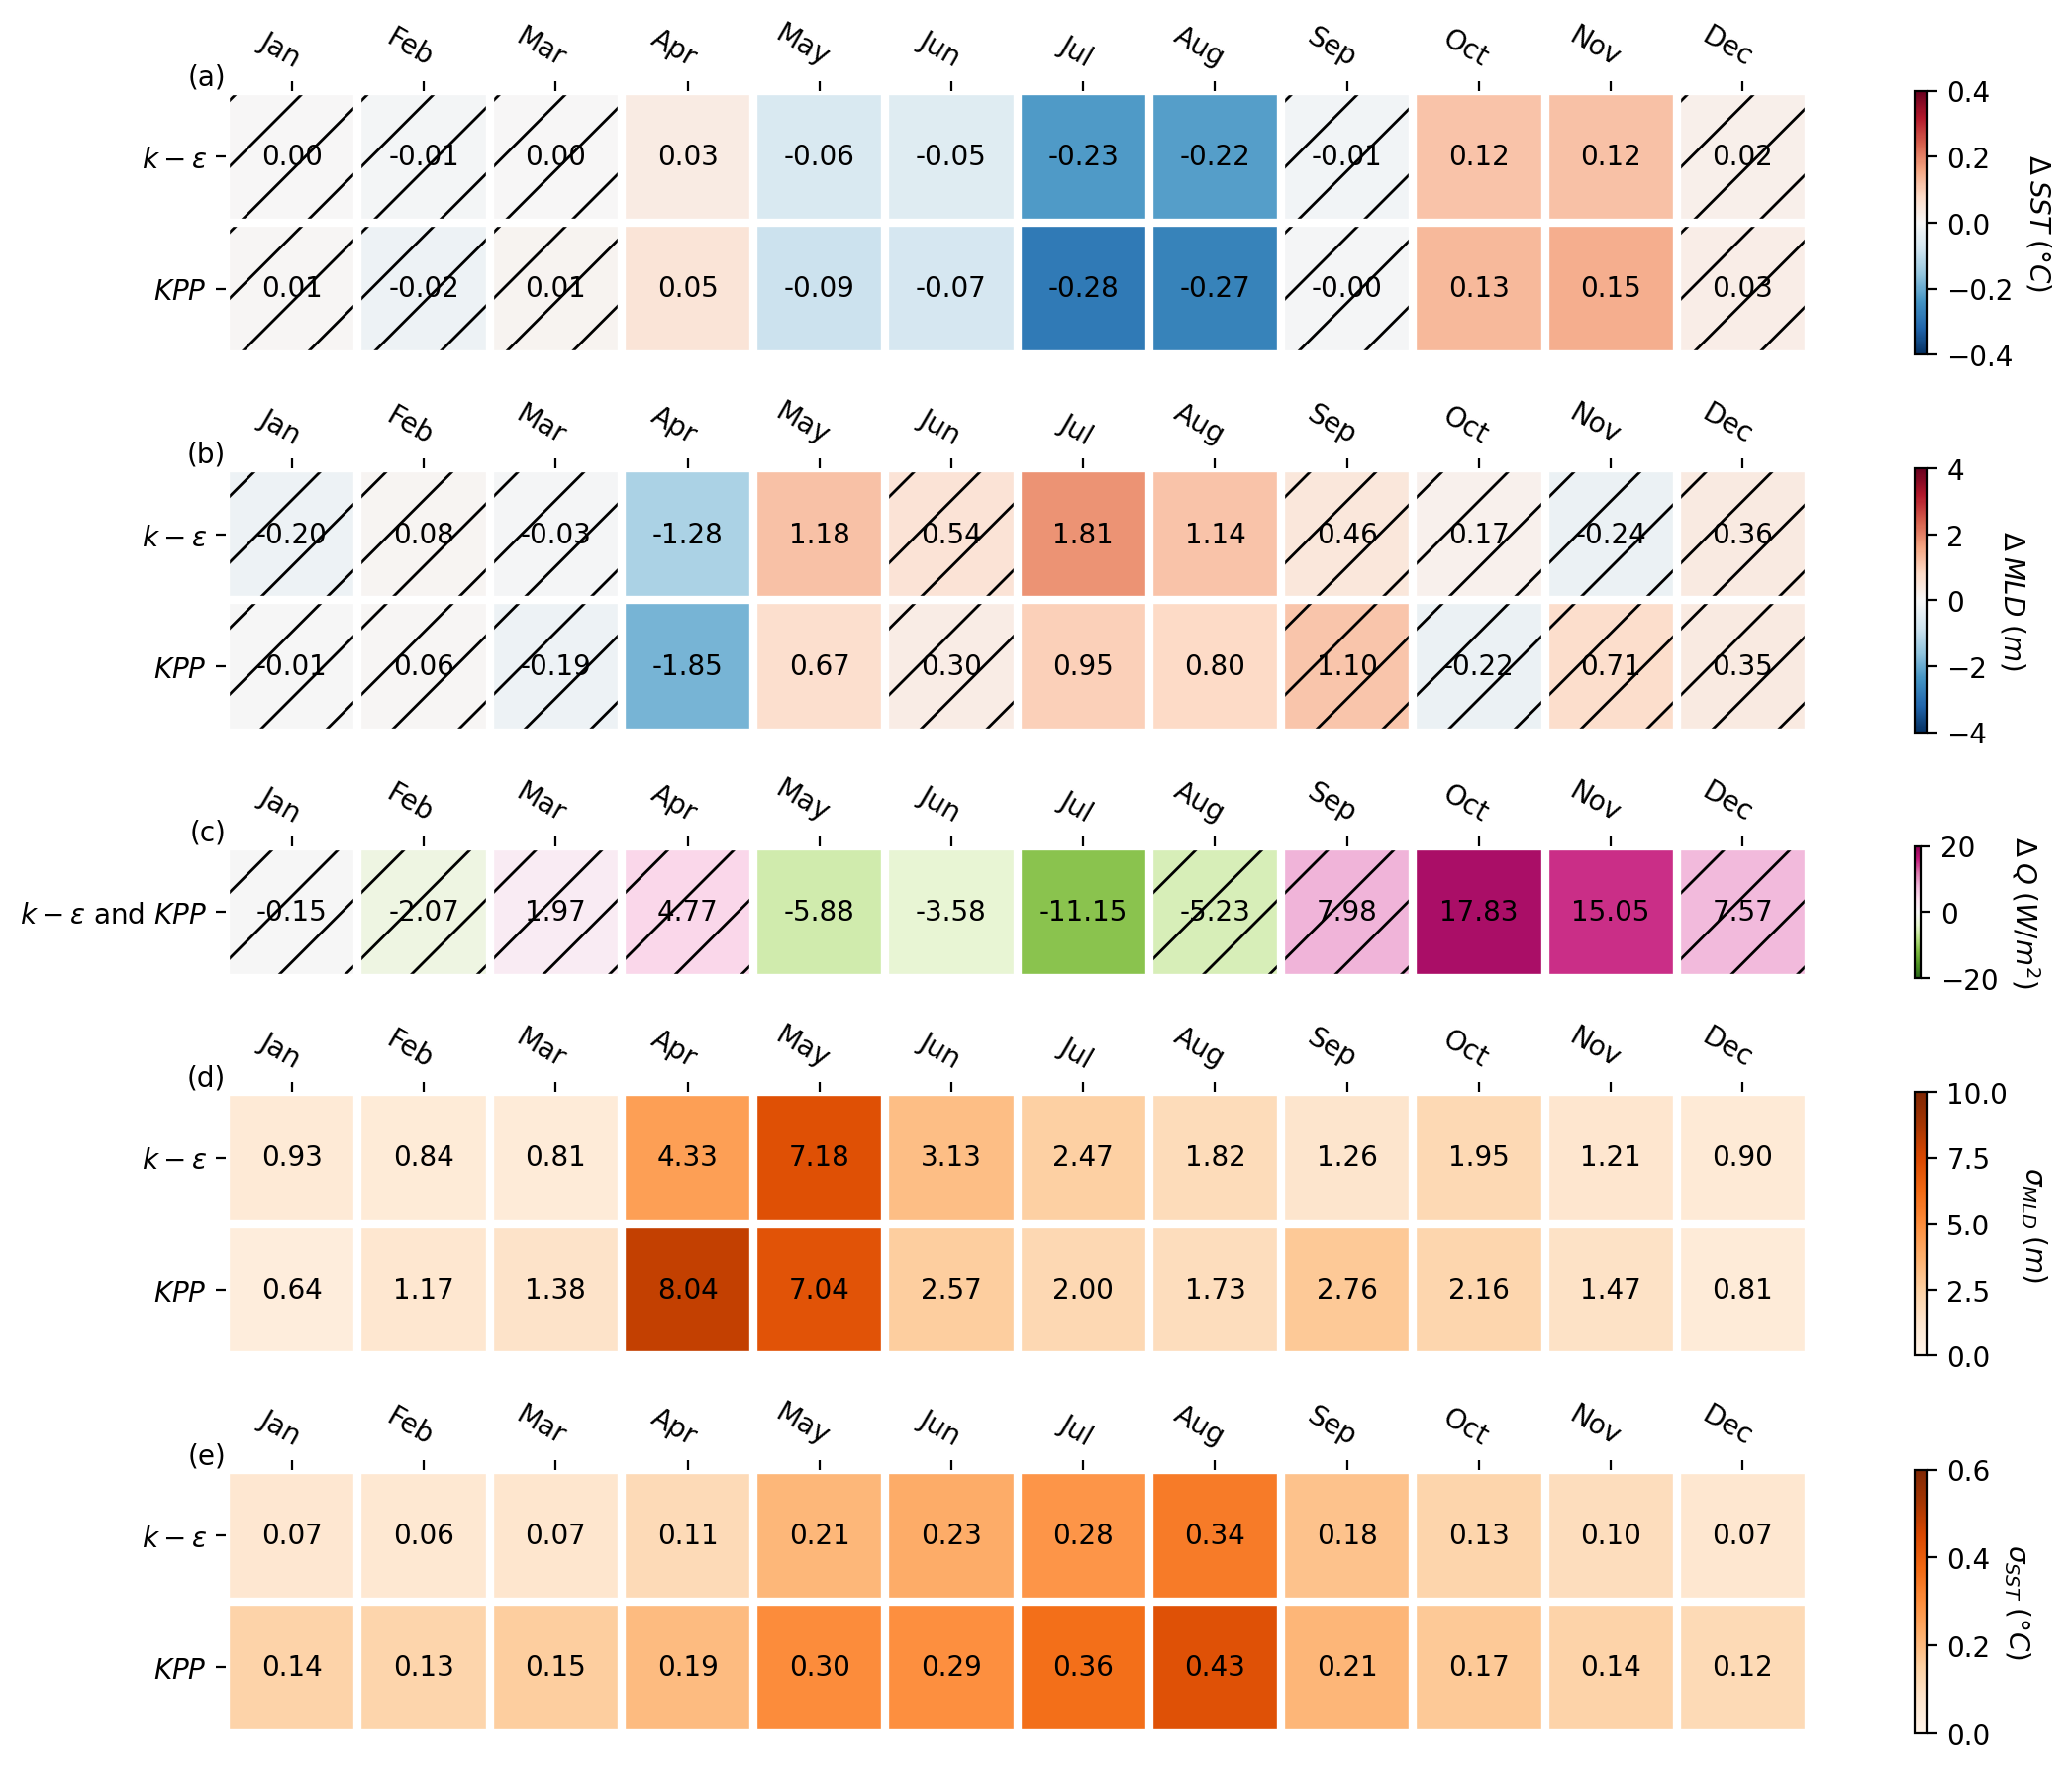

In [20]:
# Together 
fig, axes = plt.subplots(5, 1, figsize=[12,9], dpi=200, height_ratios=[2,2,1,2,2], sharex=True)
biases = [bias1, bias2] 
row_labels = ['$k-\epsilon$', '$KPP$'] 

# SST
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = axes[0]; option = 'SST_diffs' 
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=0.4, vmin=-0.4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: SST \; (\degree C)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# MLD
ax = axes[1]; option = 'MLD_diffs'  
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=4, vmin=-4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: MLD \; (m)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# Q
row_labels = ['$k-\epsilon$ and $KPP$']
ax = axes[2]; option = 'Q_diffs' 
yaver_bias = getattr(bias1, option).mean(axis=0) 
sign_agree = bias1.checksigns(option) 
yaver_bias = np.array(yaver_bias).reshape(1,-1); sign_agree = np.array(sign_agree).reshape(1,-1)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=20, vmin=-20, cmap='PiYG_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: Q \; (W/m^2)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

########## Stochastic ###########
stochs = [stoch1, stoch2] 
row_labels = ['$k-\epsilon$', '$KPP$'] 
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# MLD spread
ax = axes[4]; option = 'MLD_stds'  
yaver_stds = np.array([getattr(stoch, option).mean(axis=0) for stoch in stochs])
im, cbar = heatmap(yaver_stds, row_labels, col_labels, ax=ax, vmax=10, vmin=0, cmap='Oranges', 
                   cbar_kw=None, cbarlabel=r"$\sigma_{MLD} \; (m)$")
texts = annotate_heatmap(im, data=yaver_stds, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)

ax = axes[3]; option = 'SST_stds'  
yaver_stds = np.array([getattr(stoch, option).mean(axis=0) for stoch in stochs])
im, cbar = heatmap(yaver_stds, row_labels, col_labels, ax=ax, vmax=0.6, vmin=0, cmap='Oranges', 
                   cbar_kw=None, cbarlabel=r"$\sigma_{SST} \; (\degree C)$")
texts = annotate_heatmap(im, data=yaver_stds, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)

flabels = ['(a)','(b)','(c)','(d)','(e)']
for i in range(len(axes)):
    axes[i].text(0., 1., flabels[i], transform=axes[i].transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()
plt.savefig(f'../plots/heatmap_together.png', bbox_inches='tight')

### Check spread between years

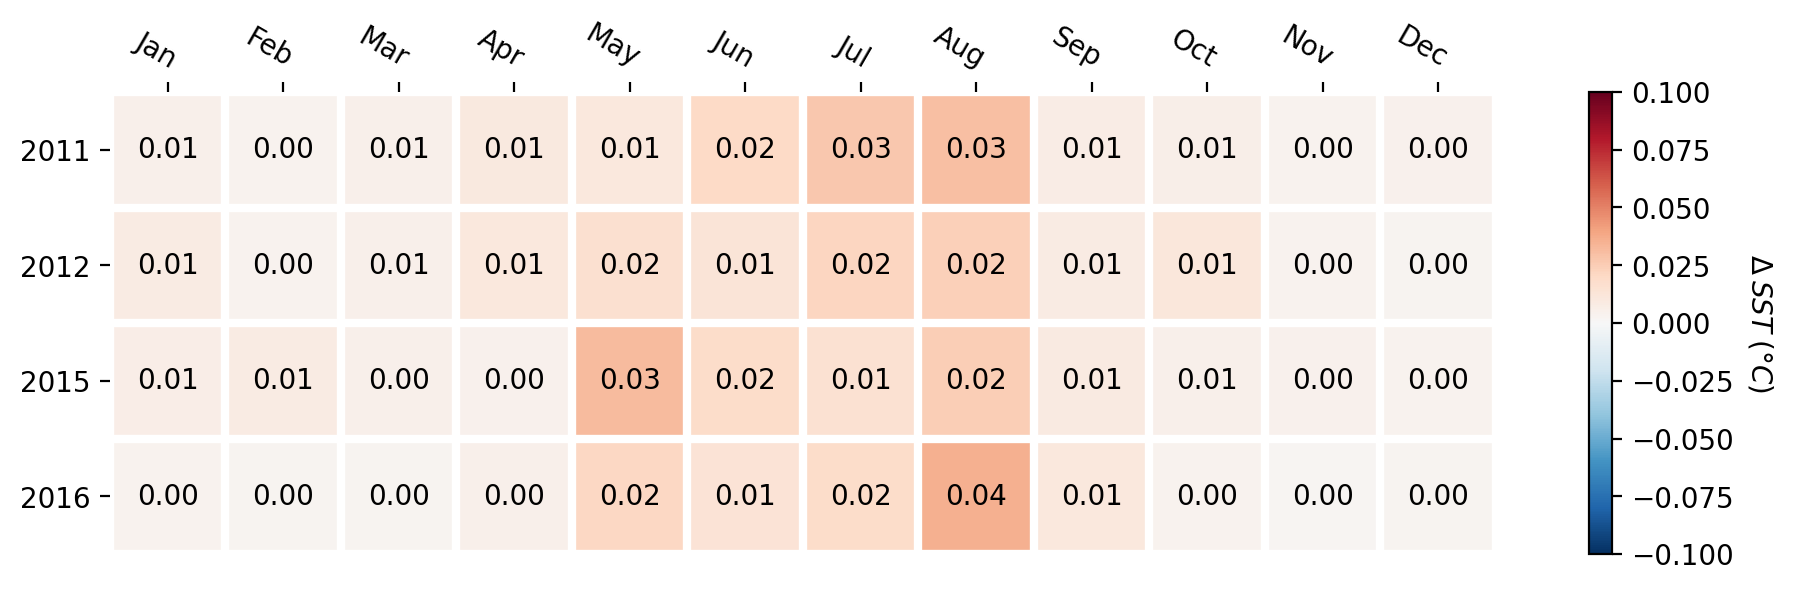

In [14]:
row_labels = ['2011', '2012', '2015', '2016']
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=[12,3], dpi=200); ax = plt.gca()
option = 'SST_diffs' 
stoch = stoch2
bias_overyears = getattr(stoch, option)
im, cbar = heatmap(bias_overyears, row_labels, col_labels, ax=ax, vmax=0.1, vmin=-0.1, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: SST \; (\degree C)$")
texts = annotate_heatmap(im, data=bias_overyears, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)

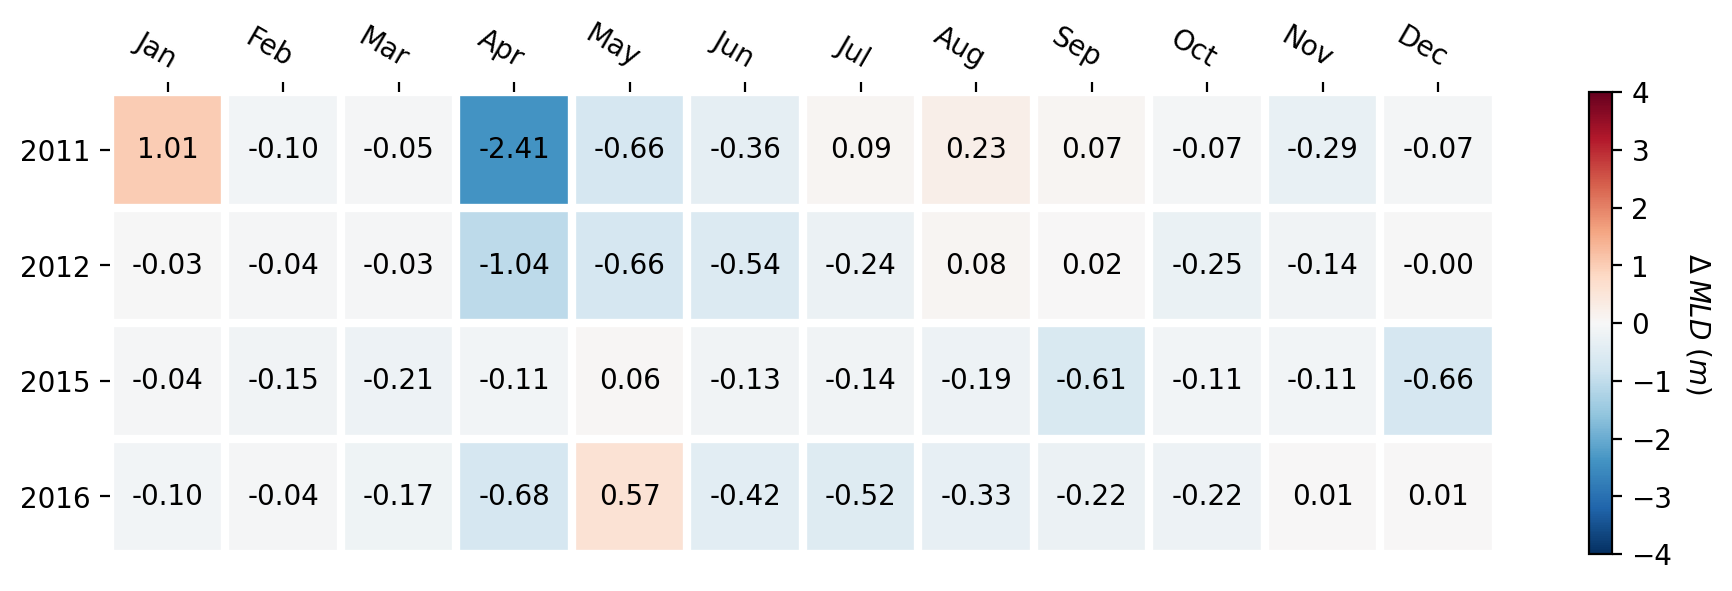

In [11]:
row_labels = ['2011', '2012', '2015', '2016']
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=[12,3], dpi=200); ax = plt.gca()
option = 'MLD_diffs' 
stoch = stoch1
bias_overyears = getattr(stoch, option)
im, cbar = heatmap(bias_overyears, row_labels, col_labels, ax=ax, vmax=4, vmin=-4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: MLD \; (m)$")
texts = annotate_heatmap(im, data=bias_overyears, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=[12,5], dpi=200, height_ratios=[2,2,1], sharex=True)
biases = [bias1, bias2] 
row_labels = ['$k-\epsilon$', '$KPP$'] 

# fig, axes = plt.subplots(3, 1, figsize=[12,5], dpi=200, height_ratios=[3,3,1], sharex=True)
# biases = [bias1, bias2, bias3]
# row_labels = ['$k-\epsilon$ 10min', '$KPP$ 10min', '$KPP$ 60min']

# SST
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = axes[0]; option = 'SST_diffs' 
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=0.4, vmin=-0.4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: SST \; (\degree C)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# MLD
ax = axes[1]; option = 'MLD_diffs'  
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=4, vmin=-4, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: MLD \; (m)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# Q
row_labels = ['$k-\epsilon$ and $KPP$']
ax = axes[2]; option = 'Q_diffs' 
yaver_bias = getattr(bias1, option).mean(axis=0) 
sign_agree = bias1.checksigns(option) 
yaver_bias = np.array(yaver_bias).reshape(1,-1); sign_agree = np.array(sign_agree).reshape(1,-1)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=20, vmin=-20, cmap='PiYG_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: Q \; (W/m^2)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

plt.tight_layout()
plt.savefig(f'../plots/heatmap_all.png', bbox_inches='tight')

## Between k-epsilon and KPP

In [5]:
bias_ = Distance (years, combo=num2, combo_ref=num1, dir=dir)
bias_.read_compute()

Compare between 
{'flux': 'Bulk', 'method': 'kpp', 'MINUTE': 10}
and
{'flux': 'Bulk', 'method': 'kepsilon', 'MINUTE': 10}


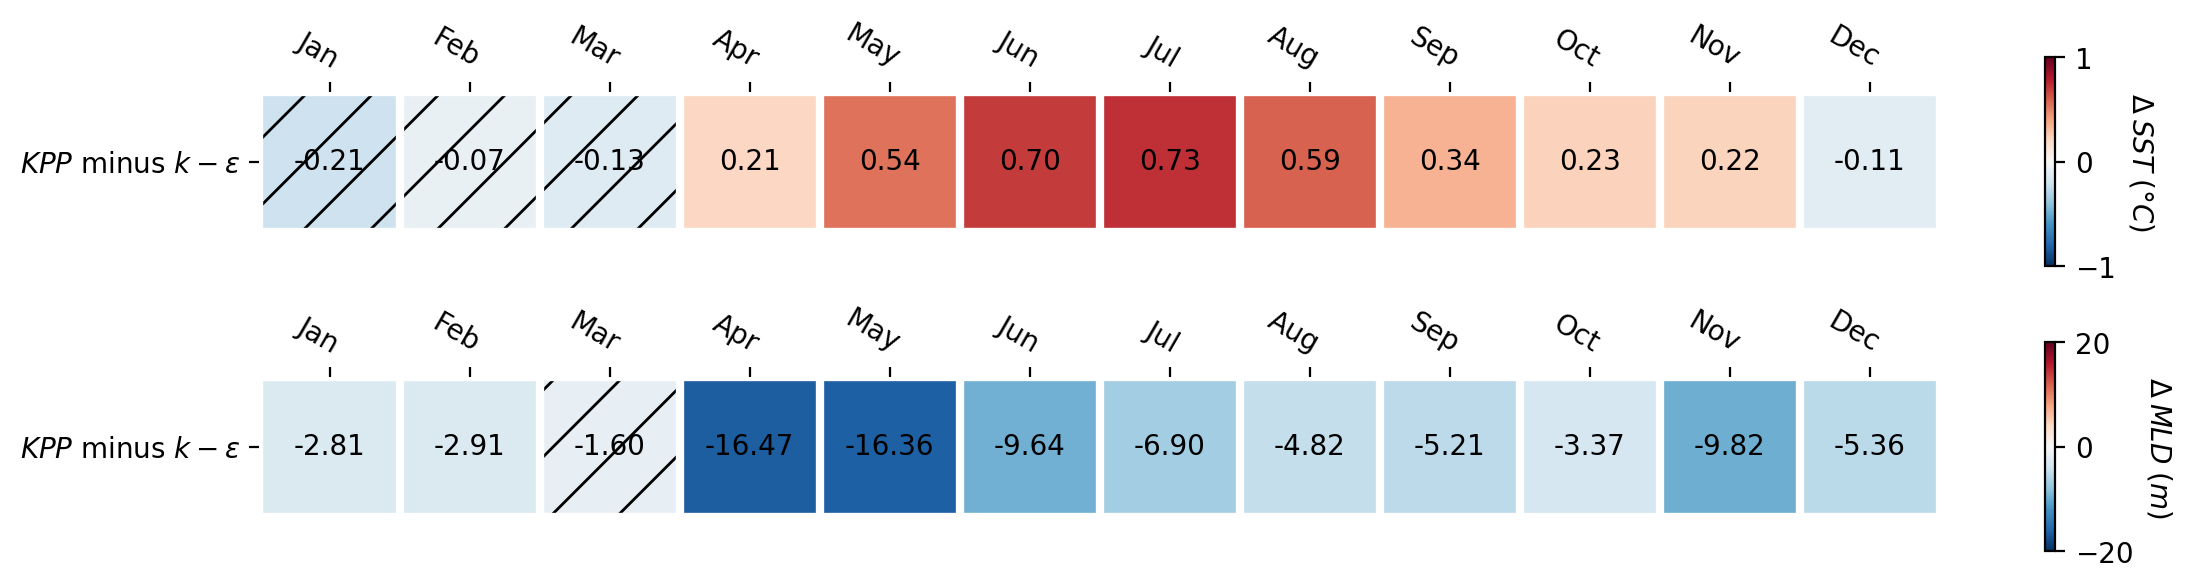

In [7]:
fig, axes = plt.subplots(2, 1, figsize=[12,3], dpi=200, height_ratios=[1,1], sharex=True)
biases = [bias_] 
row_labels = ['$KPP$ minus $k-\epsilon$'] 

# fig, axes = plt.subplots(3, 1, figsize=[12,5], dpi=200, height_ratios=[3,3,1], sharex=True)
# biases = [bias1, bias2, bias3]
# row_labels = ['$k-\epsilon$ 10min', '$KPP$ 10min', '$KPP$ 60min']

# SST
col_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = axes[0]; option = 'SST_diffs' 
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=1, vmin=-1, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: SST \; (\degree C)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-5)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

# MLD
ax = axes[1]; option = 'MLD_diffs'  
yaver_bias = [getattr(bias, option).mean(axis=0) for bias in biases]
sign_agree = [bias.checksigns(option) for bias in biases]
yaver_bias = np.array(yaver_bias); sign_agree = np.array(sign_agree)
im, cbar = heatmap(yaver_bias, row_labels, col_labels, ax=ax, vmax=20, vmin=-20, cmap='RdBu_r', 
                   cbar_kw=None, cbarlabel=r"$\Delta \: MLD \; (m)$")
texts = annotate_heatmap(im, data=yaver_bias, valfmt="{x:.2f}", textcolors=("white", "black"), threshold=-20)
for (i, j), sign in np.ndenumerate(sign_agree):
    if sign == 0:  # Apply hatching to cells where sign_agree is 0
        ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, hatch='/'))  # Diagonal forward hatch

plt.tight_layout()
plt.savefig(f'../plots/heatmap_kpp_kepsilon.png', bbox_inches='tight')